# Applying diffrent algorithms on clustered data

In [11]:
import nltk
import numpy as np
import re
import pandas as pd 
import pylab as pl
import matplotlib.pyplot as plt
from nltk.tokenize import WordPunctTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

%matplotlib inline

In [12]:
df=pd.read_csv(r"http://m.uploadedit.com/busd/1592922390522.csv")
print(len(df))

19501


In [13]:
df=df[["Tweet","Cluster"]]
df.head()

,Tweet,Cluster
0,please check what happens this woking since lo...,0
1,network fluctuations speed pathetic need alter...,4
2,this been going since this absolutely unprofes...,0
3,have done recharge haven perday with unlimited...,0
4,when still received call from customer care ve...,6


In [14]:
def Categories(row):
    num = row['Cluster']
    if(num==0):
        return "Services"
    elif(num==1):
        return "Rental Amount "
    elif(num==2):
        return "Speed"
    elif(num==3):
        return "internationaL roaming"
    elif(num==4):
        return "Network"
    elif(num==5):
        return "Replies"
    elif(num==6):
        return "Customer care"
    elif(num==7):
        return "https twitter status"
    
df['Category'] = df.apply(Categories, axis=1)

Text(0.5, 1.0, 'Topics distribuition')

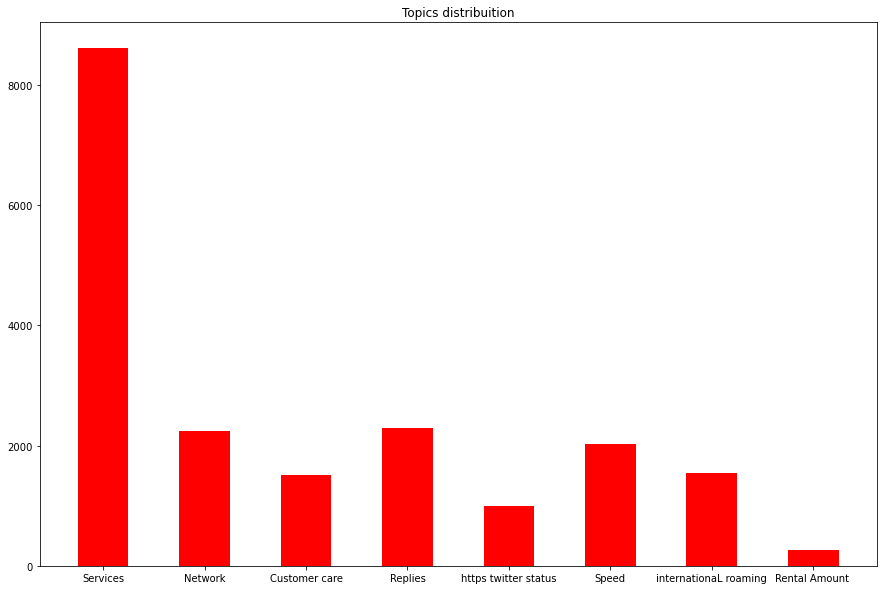

In [15]:
import matplotlib.pyplot as plt
from collections import Counter

target_cnt = Counter(df.Category)

plt.figure(figsize=(15,10))
plt.bar(target_cnt.keys(), target_cnt.values(), color='red',width=0.5)
plt.title("Topics distribuition")

In [6]:
df.head()

,Tweet,Cluster,Category
0,please check what happens this woking since lo...,0,Services
1,network fluctuations speed pathetic need alter...,4,Network
2,this been going since this absolutely unprofes...,0,Services
3,have done recharge haven perday with unlimited...,0,Services
4,when still received call from customer care ve...,6,Customer care


### TF-IDF
(term frequency-inverse document frequency)
Is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# Considering 3 grams and mimnimum frq as 0
tf_idf_vect = CountVectorizer(analyzer='word',ngram_range=(1,1),stop_words='english', min_df = 0.0001, max_df=0.7)
tf_idf_vect.fit(df['Tweet'])
desc_matrix = tf_idf_vect.transform(df["Tweet"])
desc_matrix

<19501x6096 sparse matrix of type '<class 'numpy.int64'>'
	with 173130 stored elements in Compressed Sparse Row format>

### Spliting data into train and test

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train_tfidf,x_valid_tfidf,y_train_tfidf,y_valid_tfidf = train_test_split(desc_matrix,df['Cluster'],test_size=0.3,random_state=17)

## 1) XGBoost  
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks.

In [10]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [11]:
model_tfidf=XGBClassifier(random_state=29,learning_rate=0.001)

In [12]:
model_tfidf.fit(x_train_tfidf, y_train_tfidf)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=29, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
predict_train = model_tfidf.predict(x_train_tfidf)
print('\nTarget on train data',predict_train) 


Target on train data [0 0 0 ... 6 0 0]


In [14]:
accuracy_train = accuracy_score(y_train_tfidf,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)


accuracy_score on train dataset :  0.9794871794871794


In [15]:
prediction_xgboost = model_tfidf.predict(x_valid_tfidf)
print('\nTarget on test data',prediction_xgboost) 


Target on test data [0 3 0 ... 0 4 0]


In [16]:
acc_xgboost = accuracy_score(y_valid_tfidf,prediction_xgboost)
print('\naccuracy_score on test dataset : ', acc_xgboost)


accuracy_score on test dataset :  0.9765851991112631


Text(76.19999999999999, 0.5, 'Predicted label')

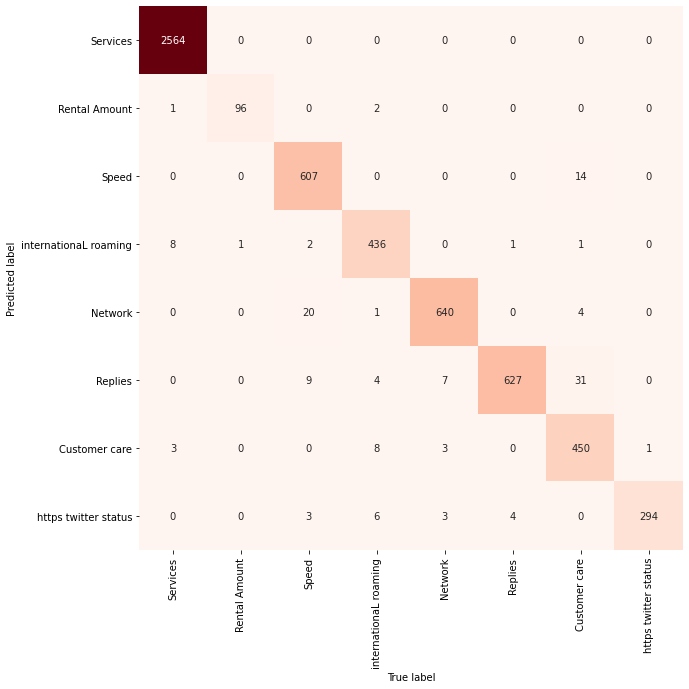

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_valid_tfidf, prediction_xgboost)
fig, ax = plt.subplots(figsize=(10,10))


sns.heatmap(cm, ax=ax,square=True, annot=True, cmap="Reds",fmt="d", cbar=False,
xticklabels=["Services","Rental Amount","Speed","internationaL roaming","Network","Replies","Customer care","https twitter status"], yticklabels=["Services","Rental Amount","Speed","internationaL roaming","Network","Replies","Customer care","https twitter status"])
plt.xlabel("True label")
plt.ylabel("Predicted label")

## 2) Decision tree classifier
Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too.
The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).
In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [20]:
dct.fit(x_train_tfidf,y_train_tfidf)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [21]:
predict_train_dct = dct.predict(x_train_tfidf)
print('\nTarget on train data',predict_train) 


Target on train data [0 0 0 ... 6 0 0]


In [22]:
accuracy_train = accuracy_score(y_train_tfidf,predict_train_dct)
print('\naccuracy_score on train dataset : ', accuracy_train)


accuracy_score on train dataset :  1.0


In [23]:
predict_test_dct = dct.predict(x_valid_tfidf)
print('\nTarget on test data',predict_test_dct) 


Target on test data [0 3 0 ... 0 4 0]


In [24]:
accuracy_test_dct = accuracy_score(y_valid_tfidf,predict_test_dct)
print('\naccuracy_score on train dataset : ', accuracy_test_dct)


accuracy_score on train dataset :  0.9870107673901897


Text(76.19999999999999, 0.5, 'Predicted label')

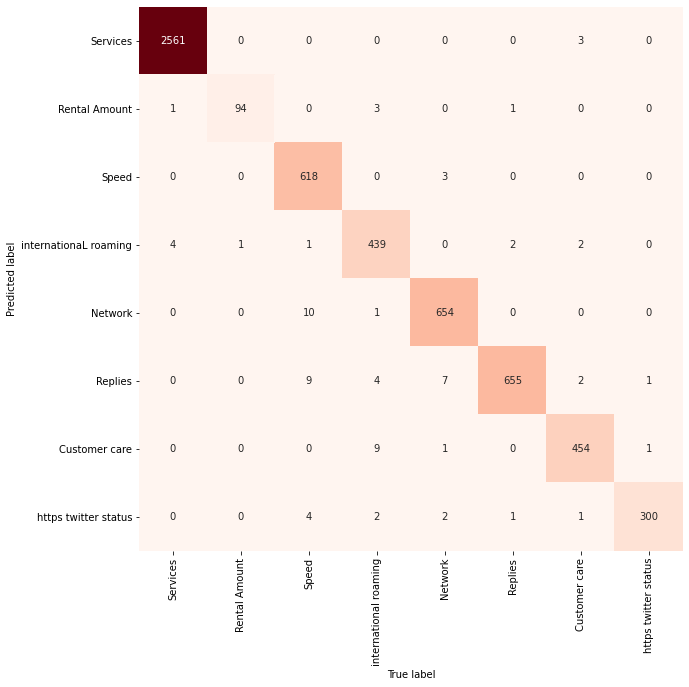

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_valid_tfidf, predict_test_dct)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, ax=ax,square=True, annot=True, cmap="Reds", fmt="d",cbar=False,
xticklabels=["Services","Rental Amount","Speed","international roaming","Network","Replies","Customer care","https twitter status"], yticklabels=["Services","Rental Amount","Speed","internationaL roaming","Network","Replies","Customer care","https twitter status"])
plt.xlabel("True label")
plt.ylabel("Predicted label")

## 3) Naive Bayes classifier

Bayes’ Theorem is stated as:

#### P(h|d) = (P(d|h) * P(h)) / P(d)

Where

##### P(h|d): Probability of hypothesis h given the data d. This is called the posterior probability.
##### P(d|h): Probability of data d given that the hypothesis h was true.
##### P(h): Probability of hypothesis h being true (regardless of the data). This is called the prior probability of h.
##### P(d): Probability of the data (regardless of the hypothesis).


We are interested in calculating the posterior probability of P(h|d) from the prior probability p(h) with P(D) and P(d|h).
After calculating the posterior probability for a number of different hypotheses, you can select the hypothesis with the highest probability. This is the maximum probable hypothesis and may formally be called the maximum a posteriori (MAP) hypothesis.


Naive Bayes is a classification algorithm for binary (two-class) and multi-class classification problems. The technique is easiest to understand when described using binary or categorical input values.

It is called naive Bayes or idiot Bayes because the calculation of the probabilities for each hypothesis are simplified to make their calculation tractable. Rather than attempting to calculate the values of each attribute value P(d1, d2, d3|h), they are assumed to be conditionally independent given the target value and calculated as P(d1|h) * P(d2|H) and so on.

This is a very strong assumption that is most unlikely in real data, i.e. that the attributes do not interact. Nevertheless, the approach performs surprisingly well on data where this assumption does not hold.

In [26]:
from sklearn.naive_bayes import MultinomialNB

In [27]:
df=pd.read_csv(r"http://m.uploadedit.com/busd/1592922390522.csv")
frame=df[["Tweet","Cluster"]]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Tweet, df.Cluster, random_state=1)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(strip_accents="ascii", token_pattern=u"(?ui)\\b\\w*[a-z]+\\w*\\b", lowercase=True, stop_words="english")
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [30]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, y_train)
predictions_naivebayes = naive_bayes.predict(X_test_cv)

In [31]:
from sklearn.metrics import accuracy_score
acc_naivebayes=accuracy_score(y_test, predictions_naivebayes)
print('Accuracy score:' , acc_naivebayes)

Accuracy score: 0.8486464315012305


Text(76.19999999999999, 0.5, 'Predicted label')

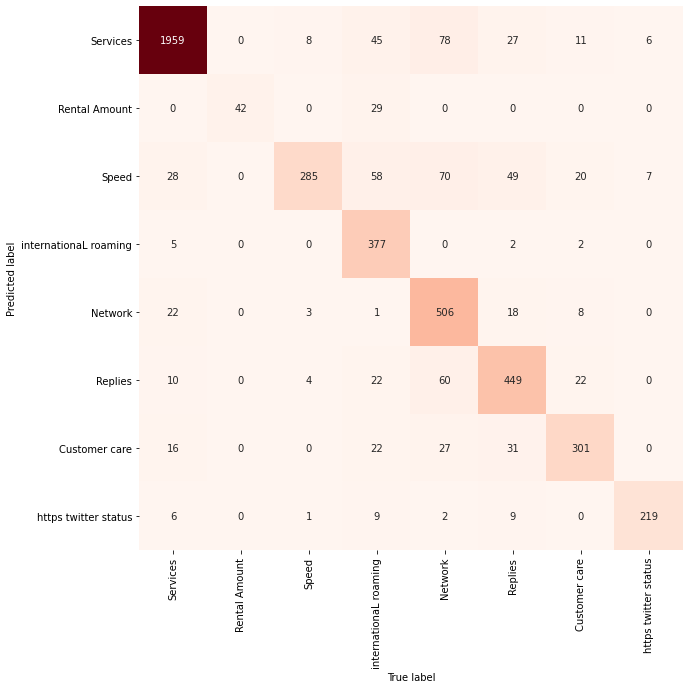

In [32]:
cm = confusion_matrix(y_test, predictions_naivebayes)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, ax=ax,square=True, annot=True, cmap="Reds",fmt="d", cbar=False,
    
xticklabels=["Services","Rental Amount","Speed","internationaL roaming","Network","Replies","Customer care","https twitter status"], yticklabels=["Services","Rental Amount","Speed","internationaL roaming","Network","Replies","Customer care","https twitter status"])
plt.xlabel("True label")
plt.ylabel("Predicted label")

### 4) Support vector machine (SVM) 

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.
To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

In [33]:
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score

In [34]:
 np.random.seed(500)

In [35]:
df=pd.read_csv(r"http://m.uploadedit.com/busd/1592922390522.csv")
df.head()

,Unnamed: 0,Tweet,Cluster
0,0,please check what happens this woking since lo...,0
1,4,network fluctuations speed pathetic need alter...,4
2,0,this been going since this absolutely unprofes...,0
3,0,have done recharge haven perday with unlimited...,0
4,6,when still received call from customer care ve...,6


In [36]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['Tweet'],df['Cluster'],test_size=0.3)

In [37]:
from sklearn.preprocessing import LabelEncoder

Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [38]:
Tfidf_vect = TfidfVectorizer(max_features=5000,decode_error='replace', encoding='utf-8')
Tfidf_vect.fit(df['Tweet'].values.astype(str))
Train_X_Tfidf = Tfidf_vect.transform(Train_X.values.astype(str))
Test_X_Tfidf = Tfidf_vect.transform(Test_X.values.astype(str))

In [39]:
#Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  97.863613057597


In [40]:
acc_svm=accuracy_score(predictions_SVM, Test_Y)

Text(76.19999999999999, 0.5, 'Predicted label')

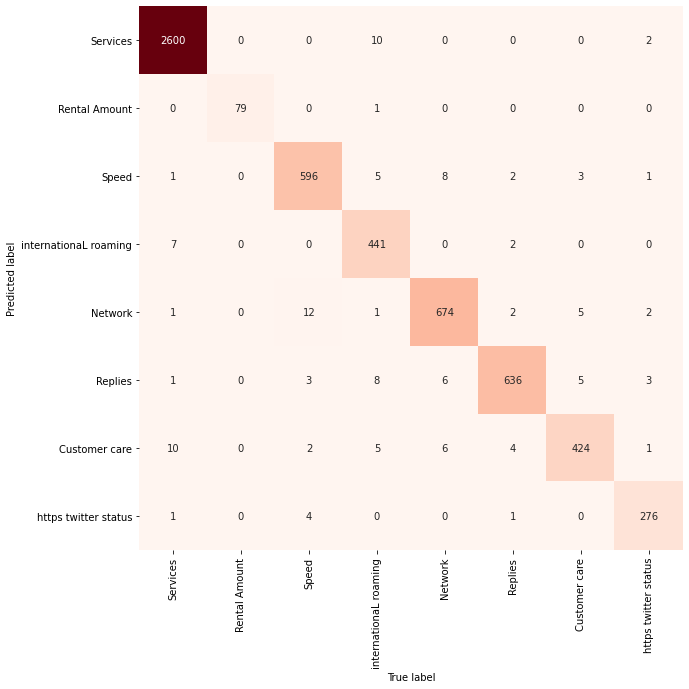

In [41]:
cm = confusion_matrix(Test_Y, predictions_SVM)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, ax=ax,square=True, annot=True, cmap="Reds",fmt="d", cbar=False,
xticklabels=["Services","Rental Amount","Speed","internationaL roaming","Network","Replies","Customer care","https twitter status"], yticklabels=["Services","Rental Amount","Speed","internationaL roaming","Network","Replies","Customer care","https twitter status"])
plt.xlabel("True label")
plt.ylabel("Predicted label")

### 5) Random Forest Classifier
Random forest consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction

The fundamental concept behind random forest is a simple but powerful one — the wisdom of crowds. In data science speak, the reason that the random forest model works so well is:
##### A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

The low correlation between models is the key. Just like how investments with low correlations (like stocks and bonds) come together to form a portfolio that is greater than the sum of its parts, uncorrelated models can produce ensemble predictions that are more accurate than any of the individual predictions. The reason for this wonderful effect is that the trees protect each other from their individual errors (as long as they don’t constantly all err in the same direction). While some trees may be wrong, many other trees will be right, so as a group the trees are able to move in the correct direction. So the prerequisites for random forest to perform well are:

1) There needs to be some actual signal in our features so that models built using those features do better than random guessing.

2) The predictions (and therefore the errors) made by the individual trees need to have low correlations with each other.

In [42]:
 from sklearn.ensemble import RandomForestClassifier

In [43]:
df=pd.read_csv(r"http://m.uploadedit.com/busd/1592922390522.csv")

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Tweet, df.Cluster, random_state=1)

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(strip_accents="ascii", token_pattern=u"(?ui)\\b\\w*[a-z]+\\w*\\b", lowercase=True, stop_words="english")
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [46]:
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train_cv, y_train) 

RandomForestClassifier(n_estimators=1000, random_state=0)

In [47]:
RandomForestClassifier(n_estimators=1000, random_state=0)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [48]:
prediction_rfc = classifier.predict(X_test_cv)

In [49]:
acc_rfc=accuracy_score(y_test, prediction_rfc)
acc_rfc

0.9796964725184577

Text(76.19999999999999, 0.5, 'Predicted label')

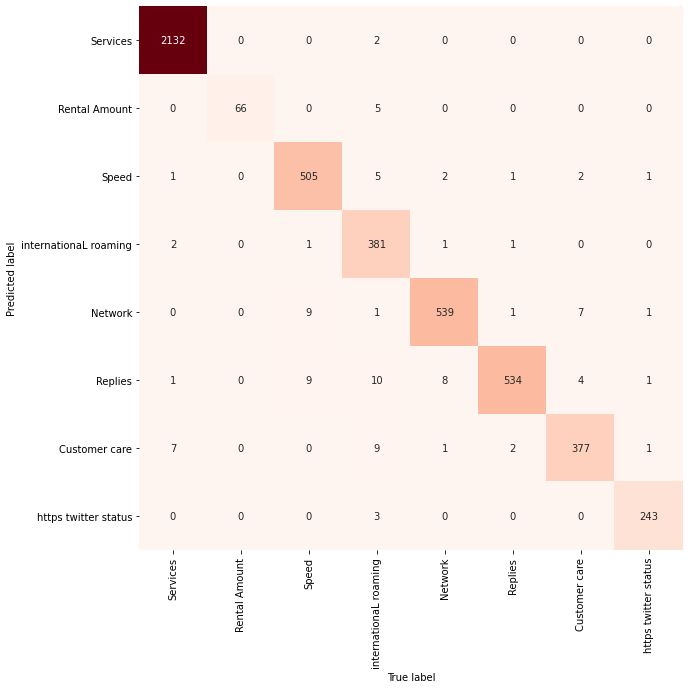

In [50]:
cm = confusion_matrix(y_test, prediction_rfc)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, ax=ax,square=True, annot=True, cmap="Reds",fmt="d", cbar=False,
xticklabels=["Services","Rental Amount","Speed","internationaL roaming","Network","Replies","Customer care","https twitter status"], yticklabels=["Services","Rental Amount","Speed","internationaL roaming","Network","Replies","Customer care","https twitter status"])
plt.xlabel("True label")
plt.ylabel("Predicted label")

## Comparision of models 

In [51]:
acc=[acc_xgboost*100,accuracy_test_dct*100,acc_naivebayes*100,acc_svm*100,acc_rfc*100]
acc

[97.6585199111263,
 98.70107673901897,
 84.86464315012306,
 97.863613057597,
 97.96964725184577]

In [52]:
algo=["XGBoost","Decsion trees","Naive Bayes","SVM","Random forest classifier"]

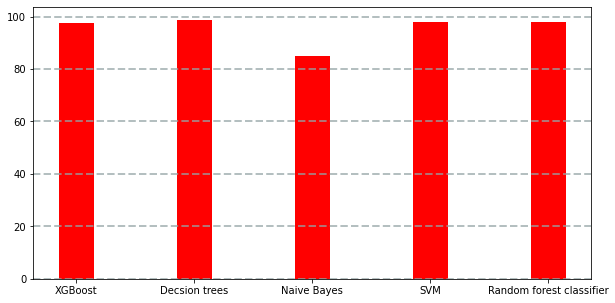

In [53]:
plt.figure(figsize=(10,5))
plt.bar(algo,acc, color='red',width=0.3)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()